## Домашнее задание №1

В этом домашнем задании вы познакомитесь с pytorch сами и сможете попрактиковаться в его применении. 

#### План:

1. Простейшие операции в pytorch
2. Пишем Adam и применяем его к ручной модели
3. Обучаем свою первую нейросеть

In [1]:
import os
import sys
import math
import torch
import random
import numpy as np
from tqdm import tqdm
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if torch.cuda.is_available():  
  dev = "cuda:0"
else:  
  dev = "cpu" 
print(dev)

cuda:0


### Простейшие операции на pytorch (2 балла)

**Task**: Cоздайте два случайных тензора (двумерных, не квадратных):

In [3]:
x = torch.rand(10, 3)
y = torch.rand(3, 10)

In [4]:
print(x, y, sep='\n')

tensor([[0.6564, 0.3536, 0.5986],
        [0.1936, 0.4011, 0.1390],
        [0.0867, 0.9827, 0.1549],
        [0.6870, 0.1506, 0.1943],
        [0.4716, 0.4208, 0.6283],
        [0.2367, 0.1049, 0.7559],
        [0.8343, 0.3690, 0.3279],
        [0.0518, 0.8929, 0.5511],
        [0.9525, 0.1926, 0.1339],
        [0.1192, 0.1363, 0.0180]])
tensor([[0.2713, 0.5162, 0.1730, 0.1998, 0.1318, 0.3348, 0.2385, 0.0629, 0.1394,
         0.6993],
        [0.5876, 0.9021, 0.4045, 0.2426, 0.3370, 0.2680, 0.2930, 0.4828, 0.2400,
         0.7080],
        [0.3278, 0.9210, 0.5982, 0.1693, 0.7840, 0.6672, 0.6844, 0.8095, 0.2241,
         0.8564]])


**Task**: Умножьте их друг на друга, результат запишите в третий тензор без использования оператора `=`:

In [5]:
res = torch.Tensor()
torch.matmul(x, y, out=res)
print(res)

tensor([[0.5820, 1.2091, 0.6147, 0.3182, 0.6750, 0.7139, 0.6698, 0.6966, 0.3106,
         1.2220],
        [0.3337, 0.5897, 0.2789, 0.1595, 0.2697, 0.2651, 0.2588, 0.3183, 0.1544,
         0.5384],
        [0.6517, 1.0738, 0.5052, 0.2819, 0.4640, 0.3958, 0.4146, 0.6052, 0.2827,
         0.8890],
        [0.3385, 0.6693, 0.2959, 0.2067, 0.2936, 0.3999, 0.3409, 0.2732, 0.1755,
         0.7534],
        [0.5811, 1.2016, 0.6276, 0.3026, 0.6965, 0.6898, 0.6657, 0.7414, 0.3076,
         1.1657],
        [0.3737, 0.9130, 0.5356, 0.2007, 0.6592, 0.6117, 0.6045, 0.6775, 0.2276,
         0.8872],
        [0.5506, 1.0655, 0.4897, 0.3117, 0.4914, 0.5970, 0.5315, 0.4961, 0.2784,
         1.1255],
        [0.7194, 1.3398, 0.6999, 0.3202, 0.7399, 0.6244, 0.6511, 0.8805, 0.3450,
         1.1404],
        [0.4154, 0.7887, 0.3228, 0.2597, 0.2954, 0.4598, 0.3752, 0.2613, 0.2091,
         0.9171],
        [0.1183, 0.2010, 0.0865, 0.0599, 0.0757, 0.0884, 0.0806, 0.0878, 0.0534,
         0.1952]])


**Task**: Реализуйте ReLU использую только pytorch, примените его к тензору `x` (запрещено использование модулей torch.nn и его подмодулей, а также функции torch.relu)

ReLU : $f(x) = \max(0, x)$

In [6]:
def relu_forward(x):
    return torch.max(torch.zeros_like(x), x)
assert torch.all(F.relu(x) == relu_forward(x))

**Task**: Сделайте тоже самое c ELU (запрещено использование модулей torch.nn и его подмодулей):

ELU : $f(x) = \max(0,x) + \min(0, \alpha * (\exp(x) - 1))$

In [7]:
def elu_forward(x, alpha: float=1.0):
    zero_array = torch.zeros_like(x)
    return torch.max(zero_array, x) + torch.min(zero_array, alpha * (torch.exp(x) - 1))

assert torch.all(F.elu(x) == elu_forward(x))

**Task**: LeakyReLU (запрещено использование модулей torch.nn и его подмодулей):

In [8]:
def lrelu_forward(x, alpha:float=0.01):
    zero_array = torch.zeros_like(x)
    return torch.max(zero_array, x) + alpha * torch.min(zero_array, x) 

assert torch.all(F.leaky_relu(x, 0.01) == lrelu_forward(x, 0.01))

**Task**: Теперь перейдем к немного более современным функциям активаций, например Mish, напомним как она выглядит:

$$x * \tanh(\ln(1+e^x))$$

(запрещено использование модулей torch.nn и его подмодулей)

In [9]:
def mish(x):
    return x.mul(torch.tanh(torch.log(torch.ones_like(x).add(torch.exp(x)))))

In [10]:
assert torch.allclose(
    mish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.8651, 0.8651, 0.8651]), 
    atol=1e-4
)

assert torch.allclose(
    mish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.5014, 0.2908, 0.5280, 0.2663], dtype=torch.float64), 
    atol=1e-4
)

**Task**: Теперь реализуем swish, напомним как она выглядит:

$$x * \sigma(x)$$

(запрещено использование модулей torch.nn и его подмодулей)

In [11]:
def swish(x):
    ones_array = torch.ones_like(x)
    return x.mul(ones_array).div(ones_array.add(torch.exp(-x)))

In [12]:
assert torch.allclose(
    swish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.7311, 0.7311, 0.7311]), 
    atol=1e-4
)

assert torch.allclose(
    swish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.4171, 0.2409, 0.4396, 0.2206], dtype=torch.float64), 
    atol=1e-4
)

### Пишем Adam и применяем его к линейной регрессии (4 балла)


В данной секции вам нужно сделать две вещи: 

1. Написать свой собственный оптимизатор подобно тому, который мы писали на семинаре
2. Обучить логистическую регрессию побатчево на картинках из датасета 


#### Adam


$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
m &=& \beta_1 m + (1 - \beta_1) g \\
v &=& \beta_2 v + (1 - \beta_2) Diag(gg^{T}) \\
\hat{m} &=& \frac{m}{1 - \beta_1^{t}} \\
\hat{v} &=& \frac{v}{1 - \beta_2^{t}} \\
w &=& w - \frac{\eta}{\sqrt{\hat{v} + \epsilon}} \odot \hat{m}
\end{eqnarray}
$$

In [13]:
# абстрактный класс, не обращайте внимания
from torch.optim import Optimizer


class InClassOptimizer(Optimizer):
    def step(self):
        """Perform single optimization step."""
        with torch.no_grad(): # выключим градиенты
            for group in self.param_groups:
                self._group_step(group)

    def _group_step(self, group):
        # group ~ dict[str, ...]
        """
        Private helper function to perform
        single optimization step on model parameters.
        """
        raise NotImplementedError()

**Task**: Напишите свою реализацию Adam:

In [14]:
class Adam(InClassOptimizer):
    def __init__(self, params, lr=0.001, eps=1e-13, beta_1=0.9, beta_2=0.999):
        defaults = dict(lr=lr, eps=eps, beta_1=beta_1, beta_2=beta_2)
        super().__init__(params, defaults)

    def _group_step(self, group):
        # One group contains information about values passed in init
        # and model parameters to update
        lr = group['lr']
        eps = group['eps']
        beta_1 = group['beta_1']
        beta_2 = group['beta_2']
        
        for param in filter(lambda x: x.grad is not None, group['params']):
            if param.grad is None: # check if gradients exist and skip if not
                continue
            grad = param.grad
            state = self.state[param]
            # initialize dict if empty
            if not state:
                state['step'] = 0
                state['m'] = torch.zeros_like(param)
                state['v'] = torch.zeros_like(param)
            
            m = state['m']
            v = state['v']
            state['step'] += 1
            m.mul_(beta_1).add_(grad, alpha=1.0 - beta_1) # subscript operators allow inplace changes
            v.mul_(beta_2).addcmul_(grad, grad, value=1.0 - beta_2)
            m_hat = m.div(1 - beta_1 ** state['step'])
            v_hat = v.div(1 - beta_2 ** state['step'])
            param.addcdiv_(m_hat, v_hat.add(eps).sqrt(), value=-lr)




    def _get_adam_buffer(self, param): # why do we even need these functions?
        """
        Get accumulated gradients for Adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradients for Adagrad.

        Returns
        -------
        Accumulated Adam gradients for parameter.
        """
        pass

    def _init_adam_buffer(self, param):
        """
        Initialize accumulated gradients for adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradients for adam.
        """
        pass

**Task**: Создайте параметры для обучения линейной регрессии, сделаем Xavier ициализацию, которая выглядит следующим образом: 

$$w \sim U[-\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}, \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}]$$

где: 

* $n_{in}$ -- размер входа (в нейронах) 
* $n_{out}$ -- размер выхода (в нейронах)

Подумайте над выбором $n_{in}$ и $n_{out}$ самостоятельно. 

In [28]:
def XavierInit(n_input: int, n_output: int):
    weights = torch.empty(n_input, n_output, device=dev, requires_grad=True)
    intercept = torch.zeros(n_output, device=dev, requires_grad=True)
    torch.nn.init.xavier_uniform_(weights) # initialize weights
    return weights, intercept

In [29]:
weights, intercept = XavierInit(28 ** 2, 10) # weight and bias moved to 'device' inside function
weights_copy, intercept_copy = XavierInit(28 ** 2, 10)
#assert torch.allclose(weights, weights_copy)
#assert torch.allclose(intercept, intercept_copy)
print(weights.data_ptr() != weights_copy.data_ptr())

True


In [30]:
CustomAdam = Adam([weights, intercept])
AdamDefault = torch.optim.Adam([weights_copy, intercept_copy], eps=1e-13)
CELoss = nn.CrossEntropyLoss()

Загрузим данные и создадим даталоадеры:

In [31]:
import torchvision
import torchvision.transforms as transforms

In [32]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
train_dataloader = torch.utils.data.DataLoader(fashion_mnist_train, batch_size=128, shuffle=True, num_workers=4)
fashion_mnist_eval = torchvision.datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

eval_dataloader = torch.utils.data.DataLoader(fashion_mnist_eval, batch_size=128, num_workers=4)

torch.Size([1, 28, 28])
Label: 2


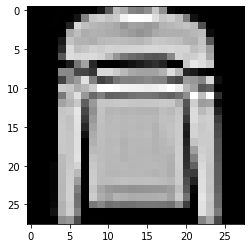

In [33]:
image, label = fashion_mnist_train[5]
plt.imshow(image[0, :, :], cmap="gray")
print(image.shape)
print(f"Label: {label}")
plt.show()

Напишите функцию для тренировки логистической регрессии, она должна: 
    * Делать предсказания 
    * Считать лосс 
    * Подсчитывать градиенты
    * Делать шаг оптимизации
    * Обнулять посчитанные градиенты
    * Считать метрики 
    * Возвращать полученные метрики
    
После этого предусмотрите возможность визуализировать метрики, чтобы нарисовать картинки, а именно от вас требуется визуализировать: 

    * Зависимость лосса от количества итераций
    * Зависимость доли правильных ответов от количества итераций

In [34]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, weights, intercept, n_input: int):
        super(LogisticRegression, self).__init__()
        self.linear = lambda x: x.matmul(weights).add(intercept)
        self.n_input = n_input
    
    def forward(self, x):
        return torch.nn.functional.softmax(self.linear(x.reshape(-1, self.n_input)), dim=1) # get logistic regression -> apply softmax tranformation

In [35]:
def accuracy(outputs, targets):
    """Computes acccuracy for outputs"""
    _, predictions = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(predictions == targets).item() / len(predictions))

In [36]:
def train_logistic_regression(model, batch, criterion, optimizer):
    model = model.train()
    inputs, targets = batch
    inputs = inputs.to(dev)
    targets = targets.to(dev)
    optimizer.zero_grad()
    outputs = model(inputs) # feed forward
    acc_value = accuracy(outputs, targets) # compute accuracy
    loss = criterion(outputs, targets) # compute loss
    loss.backward()
    optimizer.step()
    return {"loss_value": loss.detach().cpu(), "accuracy_value": acc_value.detach().cpu()} # return scalar tensors

In [37]:
def EvaluateModel(model, batch, criterion, optimizer): # get validation batch and output metrics
    inputs, targets = batch
    inputs = inputs.to(dev)
    targets = targets.to(dev)
    outputs = model(inputs)
    acc_value = accuracy(outputs, targets)
    loss = criterion(outputs, targets)
    return {"loss_value": loss.detach(), "accuracy_value": acc_value.detach()}

In [38]:
def EvaluateEpoch(model, eval_dl, criterion, optimizer):
    losses = []
    accuracies = []
    model = model.eval()
    with tqdm(total=len(eval_dl), file=sys.stdout) as prbar:
      for batch in eval_dl:
          metrics = EvaluateModel(model, batch, criterion, optimizer)
          losses.append(metrics["loss_value"])
          accuracies.append(metrics["accuracy_value"])
          prbar.set_description(f"batch vloss: {round(metrics['loss_value'].item(), 6)}, batch vacc: {round(metrics['accuracy_value'].item(), 6)}")
          prbar.update(1)
    return {"epoch_loss": torch.stack(losses).mean().detach().cpu().item(), "epoch_accuracy": torch.stack(accuracies).mean().detach().cpu().item()}

In [39]:
#train and evaluate logistic regression
def TrainAndValidateLogReg(weights, intecept, train_dataloader, eval_dataloader, loss, optimizer):
  history = []
  train_loss = []
  train_accuracy = []
  model = LogisticRegression(weights, intercept, 28 ** 2)
  model = model.to(dev)
  for epoch in range(100):
      print(f"Epoch[{epoch}] training...")
      with tqdm(total=len(train_dataloader), file=sys.stdout) as prbar:
        for batch in train_dataloader:
            metrics = train_logistic_regression(model, batch, loss, optimizer)
            train_loss.append(metrics["loss_value"].item())
            train_accuracy.append(metrics["accuracy_value"].item())
            prbar.set_description(f"batch tloss: {round(metrics['loss_value'].item(), 6)}, batch tacc: {round(metrics['accuracy_value'].item(), 6)}")
            prbar.update(1)
      epoch_metrics = EvaluateEpoch(model, eval_dataloader, loss, optimizer)
      history.append(epoch_metrics)
      print(f"epoch [{epoch}], av vloss: {round(epoch_metrics['epoch_loss'], 6)}, av vacc: {round(epoch_metrics['epoch_accuracy'], 6)}")
  return history, train_loss, train_accuracy


In [40]:
history, train_loss, train_accuracy = TrainAndValidateLogReg(weights, intercept, train_dataloader, eval_dataloader, CELoss, CustomAdam)

Epoch[0] training...
batch vloss: 1.652516, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 65.81it/s]
epoch [0], av vloss: 1.701634, av vacc: 0.797271
Epoch[1] training...
batch vloss: 1.626922, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 73.47it/s]
epoch [1], av vloss: 1.670971, av vacc: 0.815368
Epoch[2] training...
batch vloss: 1.620044, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 65.21it/s]
epoch [2], av vloss: 1.655804, av vacc: 0.825059
Epoch[3] training...
batch vloss: 1.628392, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 65.66it/s]
epoch [3], av vloss: 1.648973, av vacc: 0.828323
Epoch[4] training...
batch vloss: 1.624497, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 73.35it/s]
epoch [4], av vloss: 1.642079, av vacc: 0.834059
Epoch[5] training...
batch vloss: 1.634019, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 70.78it/s]
epoch [5], av vloss: 1.640746, av vacc: 0.834454
Epoch[6] training...
batch vloss: 1

In [41]:
_, _, _= TrainAndValidateLogReg(weights_copy, intercept_copy, train_dataloader, eval_dataloader, CELoss, AdamDefault)

Epoch[0] training...
batch vloss: 1.652561, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 66.69it/s]
epoch [0], av vloss: 1.698979, av vacc: 0.794106
Epoch[1] training...
batch vloss: 1.628562, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 75.28it/s]
epoch [1], av vloss: 1.664415, av vacc: 0.818137
Epoch[2] training...
batch vloss: 1.617969, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 74.95it/s]
epoch [2], av vloss: 1.651606, av vacc: 0.825059
Epoch[3] training...
batch vloss: 1.62043, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 69.89it/s]
epoch [3], av vloss: 1.644269, av vacc: 0.830894
Epoch[4] training...
batch vloss: 1.621783, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 67.10it/s]
epoch [4], av vloss: 1.640214, av vacc: 0.833169
Epoch[5] training...
batch vloss: 1.623496, batch vacc: 0.8125: 100%|██████████| 79/79 [00:01<00:00, 72.14it/s]
epoch [5], av vloss: 1.636583, av vacc: 0.835641
Epoch[6] training...
batch vloss: 1

In [42]:
CustomAdam0m = CustomAdam.state_dict()['state'][0]['m'] # correspoding to weights (I still get key [1] also in state_dict['state'] for reasons I don't quite understand while torch.optim.Adam has one param)
CustomAdam0v = CustomAdam.state_dict()['state'][0]['v']
AdamDefault0m = AdamDefault.state_dict()['state'][0]['exp_avg']
AdamDefault0v = AdamDefault.state_dict()['state'][0]['exp_avg_sq']

In [43]:
assert torch.allclose(CustomAdam0m, AdamDefault0m, atol=1e-2)
assert torch.allclose(CustomAdam0v, AdamDefault0v, atol=1e-2)

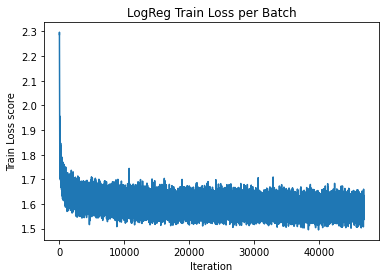

In [44]:
train_loss = np.array(train_loss)
iters = np.arange(1, len(train_loss) + 1)
fig, ax = plt.subplots()
plt.xlabel("Iteration")
plt.ylabel("Train Loss score")
plt.title("LogReg Train Loss per Batch")
ax.plot(iters, train_loss)
plt.show()

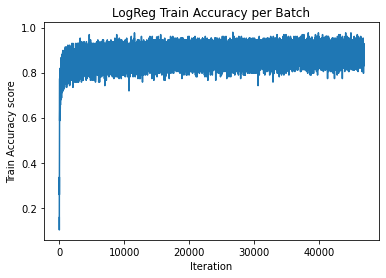

In [45]:
train_accuracy = np.array(train_accuracy)
iters = np.arange(1, len(train_accuracy) + 1)
fig, ax = plt.subplots()
plt.xlabel("Iteration")
plt.ylabel("Train Accuracy score")
plt.title("LogReg Train Accuracy per Batch")
ax.plot(iters, train_accuracy)
plt.show()

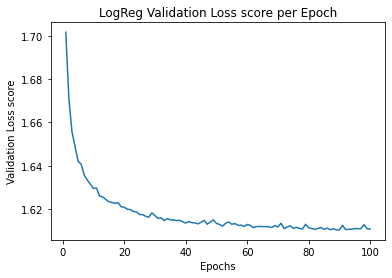

In [46]:
losses = np.array([x["epoch_loss"] for x in history])
x = np.arange(1, len(losses) + 1)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss score")
plt.title("LogReg Validation Loss score per Epoch")
ax.plot(x, losses)
plt.show()

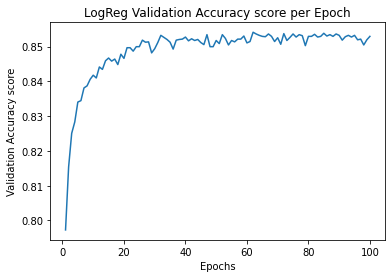

In [47]:
accuracies = np.array([x["epoch_accuracy"] for x in history])
x = np.arange(1, len(accuracies) + 1)
fig, ax = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy score")
plt.title("LogReg Validation Accuracy score per Epoch")
ax.plot(x, accuracies)
plt.show()

#### Вопросы к секции: 

* Своими словами и без математики объясните благодаря чему Adam дает несмещенную оценку на квадрат градиента
* Когда модель начала переобучаться? Как вы это поняли? Сделайте визуализацию и докажите свою точку зрения.

Adam gives unbiased estimation due to correction of second exponential moving average that is dependent on squared gradients.


### Моя первая нейросеть (4 балла)

В данной секции вам нужно сделать следующие вещи: 

* Реализовать три разных архитектуры нейросетей. Эти архитектуры должны принципиально отличаться друг от друга. Разрешается одной из архитекур брать полностью полносвязную модель. Остальные две должны быть сверточными и сильно отличаться друг от друга. К примеру, одна из таких архитектур может быть VGG подобная сеть, а другая ResNet подобная архитектура. 

* Написать цикл для обучения которым можно обучать все три модели без изменений кода

* Попробовать каждую модель с двумя оптимизаторами: RMSprop и SGD with momentum

* Визуализировать результаты перфоманса каждой модели (две метрики минимум для каждого сетапа, например, лосс и долю правильных ответов). В данном пункте мы ждем от вас визуализацию зависимости метрики от номера итерации обучения.

* Сделать выводы какие были модели были лучше и как вы думаете почему?

**Сейчас мы узнаем, кто же босс этой качалки!**

#### MLP

Fully Connected layer (FC) and Multi-layered Perceptron (MLP) are used interchangeably. Each layer's node is connected to every node in adjacent layer. Each layer is activated with appropriate Activation Function. 
Input and Output Layer dimensions are flattened 2D tensors representing monochrome pictures and number of labels in dataset respectively.

In [143]:
class DenseMLP(torch.nn.Module):
    def __init__(self, n_input: int, n_output: int):
        super(DenseMLP, self).__init__()
        self.n_input = n_input
        self.model = nn.Sequential(
            nn.Linear(self.n_input, 100, bias=True), # 28 x 28
            nn.ReLU(True),
            nn.Linear(100, 200, bias=True),
            nn.ReLU(True),
            nn.Linear(200, n_output, bias=True) # 10
        )
        self.model.apply(self._init_weights) # recursively apply xavier initialization to Linear layers
    
    @torch.no_grad()
    def _init_weights(self, module) -> None:
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)

    def forward(self, x):
        return self.model(x.reshape(-1, self.n_input)) # obtain 1D array instead of 2D

### VGG
This is not real VGG. Real VGG represent deep networks with up to 19 layers of consecutive convolutions and pooling with Linear layers in the end.
Convolutions and pooling are used for feature mapping and downsampling respectively.

VGGs initially were trained on ImageNet dataset and were designed for 224 x 224 inputs. Our inputs are 28 x 28 and manual scaling of monochrome picture would definintely lead to (a) increased training time and (b) inadequate loss and accuracy due to inability to create rich feature mapping from blur pictures (which fashion-mnist images are).

That's why we use our own VGG-like model, which uses two convolution blocks as Encoder and linear classifier as Decoder.
Block represents Convolution to acquire feature mapping, Batch Normalization for acceleration of training, pooling for downsampling.
In linear classifier we use dropout as a regularization technique.

In [154]:
class VGG(torch.nn.Module):
    def __init__(self, in_ch: int, n_output: int):
      super(VGG, self).__init__()
      self.kernel_conv, self.kernel_pool = (3, 2)
      self.encoder = self.Encoder([in_ch, 32, 64], self.kernel_conv, self.kernel_pool)
      self.decoder = self.Decoder([6 * 6 * 64, 8 * 64, 64 * 2, n_output])

    def forward(self, x):
      return self.decoder(self.encoder(x))
    
    class Encoder(torch.nn.Module):
      def __init__(self, enc_sizes: list, k_conv: int, k_pool: int):
        super(VGG.Encoder, self).__init__()
        self.encode = nn.Sequential(
          self._get_conv_block(enc_sizes[0], enc_sizes[1], k_pool, kernel_size=k_conv, padding=1),
          self._get_conv_block(enc_sizes[1], enc_sizes[2], k_pool, kernel_size=k_conv, padding=0)
        )

      @staticmethod
      def _get_conv_block(in_ch: int, out_ch: int, k_pool: int, *args, **conv_params):
        block = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, *args, **conv_params),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(),
            nn.MaxPool2d(k_pool)
        )
        return block
      
      def forward(self, x):
        return self.encode(x)

    class Decoder(torch.nn.Module):
        def __init__(self, dec_sizes: list):
          super(VGG.Decoder, self).__init__()
          self.decode = nn.Sequential(
            nn.Linear(dec_sizes[0], dec_sizes[1]),
            nn.Dropout(0.22), # dec_sizes[1] / dec_sizes[0] ~ 0.(2)
            nn.Linear(dec_sizes[1], dec_sizes[2]),
            nn.Linear(dec_sizes[2], dec_sizes[3])
          )

        def forward(self, x):
          return self.decode(x.reshape(-1, 6 * 6 * 64))


In [145]:
class ResNet(torch.nn.Module):
    pass

### ModelGym
ModelGym class is an abstraction over three architectures for ease of Training and Presenting Metrics. It is overhead but is still useful and concise for representing results.

In [146]:
class ModelGym():
    def __init__(self, train_dl, eval_dl, architecture: str, optimizer: str, n_epochs:int=10, _lr:float=0.01):
      try:
        self.net, self.optim = self._getArchitectureAndOptimizer(architecture, optimizer)
      except:
        raise RuntimeError("ModelGym doesn't support model with suggested architecture or optimizer")
      self.name_architecture = architecture
      self.name_optimizer = optimizer
      if architecture == "DenseMLP":
        self.net = self.net(784, 10)
        assert(isinstance(self.net, DenseMLP))
      elif architecture == "VGG":
        self.net = self.net(1, 10)
        assert(isinstance(self.net, VGG))
      elif architecture == "ResNet":
        self.net.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.net.fc.in_features
        print(num_ftrs)
        self.net.fc = nn.Linear(num_ftrs, 10)
      if optimizer == 'RMSprop':
        self.optim = self.optim(self.net.parameters(), lr=_lr)
      elif optimizer == 'SGD':
        self.optim = self.optim(self.net.parameters(), lr=_lr, momentum=0.9, nesterov=True)
      self.train_dl = train_dl
      self.eval_dl = eval_dl
      self.n_epochs = n_epochs
      self.criterion = nn.CrossEntropyLoss()

    def _getArchitectureAndOptimizer(self, architecture: str, optimizer: str) -> tuple:
      """
        Returns Class Instance for selected architecture (DenseMLP, VGG, ResNet)
        Return torch.optim.Optimizer inherited class (SGD or RMSprop)
      """
      optimizers = {'RMSprop': torch.optim.RMSprop, 'SGD': torch.optim.SGD}
      architectures = {'DenseMLP': DenseMLP, 'VGG': VGG, 'ResNet': torchvision.models.resnet18(pretrained=False)}
      return architectures[architecture], optimizers[optimizer]
    
    def _train_epoch(self):
      """
        Accumulates loss and accuracy over all possible batches
        Does backpropagation for selected architecture
      """
      self.net = self.net.train()
      with tqdm(total=len(self.train_dl), file=sys.stdout) as prbar:
        for inputs, targets in self.train_dl:
          inputs = inputs.to(dev)
          targets = targets.to(dev)
          self.optim.zero_grad()
          outputs = self.net(inputs) # feed forward
          acc_value = accuracy(outputs, targets) # compute accuracy
          loss = self.criterion(outputs, targets) # compute loss
          loss.backward()
          self.optim.step()
          self.train_loss.append(loss.detach().cpu().item())
          self.train_acc.append(acc_value.detach().cpu().item())
          prbar.set_description(f"batch tloss: {round(loss.item(), 6)}, batch tacc: {round(acc_value.item(), 6)}")
          prbar.update(1)


    @torch.no_grad()
    def _validate_epoch(self):
      """
        Calculates Average Loss and Accuracy over Epoch
      """
      loss_history = []
      acc_history = []
      self.net = self.net.eval()
      with tqdm(total=len(self.eval_dl), file=sys.stdout) as prbar:
        for inputs, targets in self.eval_dl:
          inputs = inputs.to(dev)
          targets = targets.to(dev)
          outputs = self.net(inputs) # feed forward
          acc_value = accuracy(outputs, targets) # compute accuracy
          loss = self.criterion(outputs, targets) # compute loss
          loss_history.append(loss)
          acc_history.append(acc_value)
          prbar.set_description(f"batch vloss: {round(loss.item(), 6)}, batch vacc: {round(acc_value.item(), 6)}")
          prbar.update(1)
      return torch.stack(loss_history).mean().detach().cpu().item(), torch.stack(acc_history).mean().detach().cpu().item()

    def TrainModel(self):
      """
        Iterates over n_epochs making consecutive calls to _train_epoch and _validate_epoch
        Accumulates validation metrics and prints intermediary results
      """
      self.train_loss = []
      self.train_acc = []
      self.val_loss = []
      self.val_acc = []
      self.net = self.net.to(dev)
      for epoch in range(self.n_epochs):
        self._train_epoch()
        av_loss, av_acc = self._validate_epoch()
        self.val_loss.append(av_loss)
        self.val_acc.append(av_acc)
        print(f"epoch [{epoch}], av loss: {round(av_loss, 6)}, av acc: {round(av_acc, 6)}")
    
    def _display_plot(self, history: list, sample_type: str, metric: str):
      """
        (list) history: one of accumulated metrics over train and validation phases
        (str) sample_type: train, validation
        (str) metric: loss, accuracy
        Helper private function for displaying
      """
      tmp = np.array(history)
      iterations = np.arange(1, len(tmp) + 1)
      fig, ax = plt.subplots(figsize=(5,3))
      name_iters = "Epoch" if sample_type == 'validation' else 'Iteration'
      plt.xlabel(name_iters)
      plt.ylabel(f"{sample_type} {metric}")
      plt.title(f"{self.name_architecture} {sample_type} {metric} per {name_iters} with {self.name_optimizer}")
      ax.plot(iterations, tmp)
      plt.show()

    def DisplaySingleMetric(self, sample_type: str, metric: str):
      """
        (str) sample_type: train, validation
        (str) metric: loss, accuracy
        Displays chosen metric data as a plot over number of iterations or epochs
      """
      if sample_type == 'train':
        if metric == 'loss':
          self._display_plot(self.train_loss, sample_type, metric)
        elif metric == 'accuracy':
          self._display_plot(self.train_acc, sample_type, metric)
      elif sample_type == 'validation':
        if metric == 'loss':
          self._display_plot(self.val_loss, sample_type, metric)
        elif metric == 'accuracy':
          self._display_plot(self.val_acc, sample_type, metric)
      else:
        raise RuntimeError("Metric isn't implemented")

In [147]:
def PrintMetrics(arch: ModelGym):
  arch.DisplaySingleMetric('train', 'loss')
  arch.DisplaySingleMetric('train', 'accuracy')
  arch.DisplaySingleMetric('validation', 'loss')
  arch.DisplaySingleMetric('validation', 'accuracy')

In [148]:
MLP_rms = ModelGym(train_dataloader, eval_dataloader, 'DenseMLP', 'RMSprop', n_epochs=25, _lr=0.001) # change lr to prevent gradient explosion
MLP_sgd = ModelGym(train_dataloader, eval_dataloader, 'DenseMLP', 'SGD', n_epochs=25)


In [155]:
VGG784_rms = ModelGym(train_dataloader, eval_dataloader, 'VGG', 'RMSprop', n_epochs=25, _lr=0.001) # change lr to prevent gradient explosion
VGG784_sgd = ModelGym(train_dataloader, eval_dataloader, 'VGG', 'SGD', n_epochs=25)

In [149]:
MLP_rms.TrainModel()

batch vloss: 0.301535, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 72.99it/s]
epoch [0], av loss: 0.433493, av acc: 0.847013
batch vloss: 0.314708, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 71.24it/s]
epoch [1], av loss: 0.410956, av acc: 0.850969
batch vloss: 0.16738, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 70.50it/s]
epoch [2], av loss: 0.387916, av acc: 0.856903
batch vloss: 0.204927, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 72.29it/s]
epoch [3], av loss: 0.36607, av acc: 0.86699
batch vloss: 0.170721, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 69.72it/s]
epoch [4], av loss: 0.347069, av acc: 0.872033
batch vloss: 0.081673, batch vacc: 1.0: 100%|██████████| 79/79 [00:01<00:00, 72.20it/s]
epoch [5], av loss: 0.400745, av acc: 0.859078
batch vloss: 0.169345, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 72.41it/s]
epoch [6], av loss: 0.336901, av acc: 0.876483
batch vloss: 0.126709, batch vacc: 0.9375:

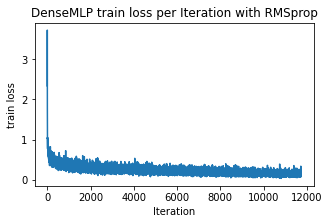

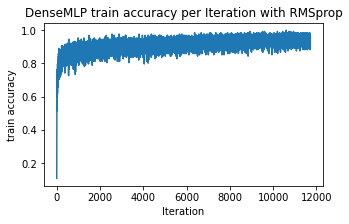

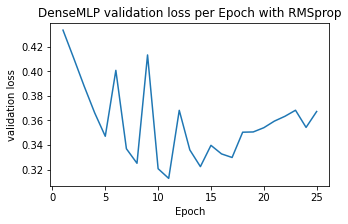

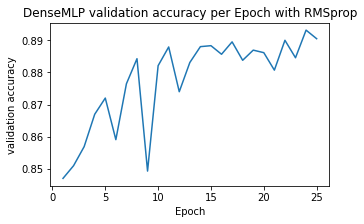

In [150]:
PrintMetrics(MLP_rms)

In [151]:
MLP_sgd.TrainModel()

batch vloss: 0.287239, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 73.10it/s]
epoch [0], av loss: 0.478044, av acc: 0.829213
batch vloss: 0.304977, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 64.89it/s]
epoch [1], av loss: 0.42725, av acc: 0.846618
batch vloss: 0.278513, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 72.80it/s]
epoch [2], av loss: 0.405922, av acc: 0.853837
batch vloss: 0.260006, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 72.19it/s]
epoch [3], av loss: 0.39856, av acc: 0.857892
batch vloss: 0.24, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 70.34it/s]
epoch [4], av loss: 0.375144, av acc: 0.865803
batch vloss: 0.258481, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 67.70it/s]
epoch [5], av loss: 0.372514, av acc: 0.868473
batch vloss: 0.301331, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 67.89it/s]
epoch [6], av loss: 0.374932, av acc: 0.867484
batch vloss: 0.245689, batch vacc: 0.9375: 

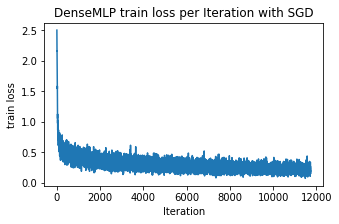

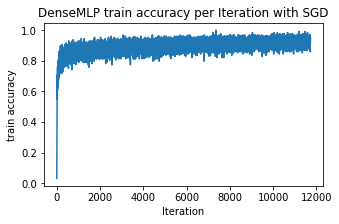

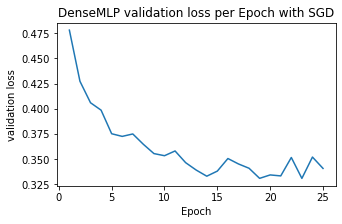

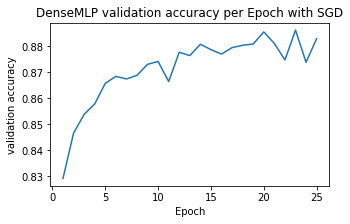

In [152]:
PrintMetrics(MLP_sgd)

In [156]:
VGG784_rms.TrainModel()

batch vloss: 0.55052, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 62.39it/s]
epoch [0], av loss: 0.501465, av acc: 0.822785
batch vloss: 0.341816, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 68.09it/s]
epoch [1], av loss: 0.569005, av acc: 0.796578
batch vloss: 0.29807, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 68.16it/s]
epoch [2], av loss: 0.371765, av acc: 0.874901
batch vloss: 0.211461, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 66.41it/s]
epoch [3], av loss: 0.548463, av acc: 0.803204
batch vloss: 0.225898, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 65.31it/s]
epoch [4], av loss: 0.287254, av acc: 0.895866
batch vloss: 0.361942, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 69.43it/s]
epoch [5], av loss: 0.284299, av acc: 0.89557
batch vloss: 0.328562, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 67.93it/s]
epoch [6], av loss: 0.264437, av acc: 0.904173
batch vloss: 0.309618, batch vacc: 0.9375: 

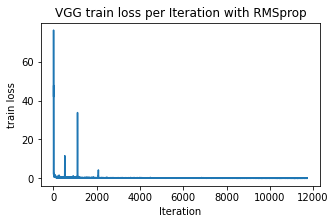

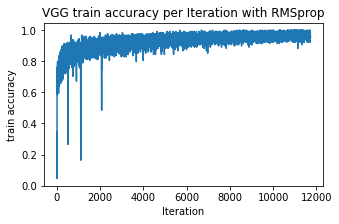

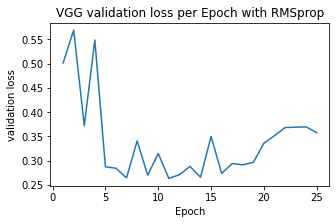

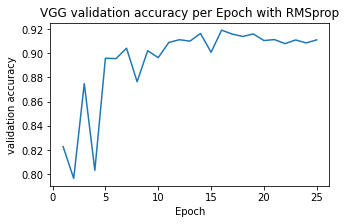

In [157]:
PrintMetrics(VGG784_rms)

In [158]:
VGG784_sgd.TrainModel()

batch vloss: 0.129892, batch vacc: 1.0: 100%|██████████| 79/79 [00:01<00:00, 69.42it/s]
epoch [0], av loss: 0.322912, av acc: 0.887065
batch vloss: 0.152339, batch vacc: 1.0: 100%|██████████| 79/79 [00:01<00:00, 68.56it/s]
epoch [1], av loss: 0.279525, av acc: 0.898141
batch vloss: 0.206408, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 68.73it/s]
epoch [2], av loss: 0.269993, av acc: 0.903184
batch vloss: 0.265274, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 68.46it/s]
epoch [3], av loss: 0.284306, av acc: 0.898438
batch vloss: 0.185219, batch vacc: 0.9375: 100%|██████████| 79/79 [00:01<00:00, 69.11it/s]
epoch [4], av loss: 0.307009, av acc: 0.893987
batch vloss: 0.172, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 68.93it/s]
epoch [5], av loss: 0.283799, av acc: 0.89646
batch vloss: 0.26437, batch vacc: 0.875: 100%|██████████| 79/79 [00:01<00:00, 67.83it/s]
epoch [6], av loss: 0.299195, av acc: 0.901503
batch vloss: 0.185195, batch vacc: 0.875: 100%|██

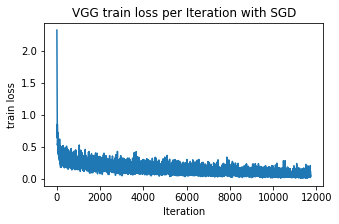

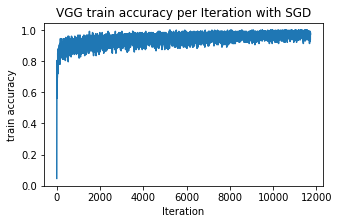

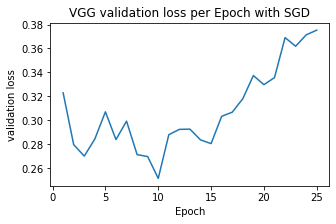

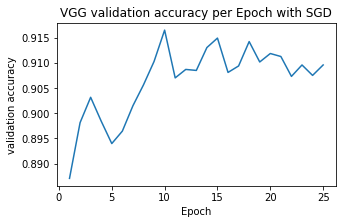

In [159]:
PrintMetrics(VGG784_sgd)

In [178]:
train_dataloader224 = torch.utils.data.DataLoader(fashion_mnist_train, batch_size=128, shuffle=True, num_workers=0, pin_memory=False)
eval_dataloader224 = torch.utils.data.DataLoader(fashion_mnist_eval, batch_size=128, num_workers=0, pin_memory=False)

In [179]:
resnet = ModelGym(train_dataloader224, eval_dataloader224, 'ResNet', 'SGD', n_epochs=1)

512


In [ ]:
resnet.TrainModel()

batch tloss: 0.21212, batch tacc: 0.916667: 100%|█████████▉| 468/469 [00:23<00:00, 20.02it/s] 